Goal of script is to create array of blast wave intensity data (psi; use second column of psi data (corresponds to sensor by subject) from a specified directory (usually all of the blast waves from a specific experiment) to be used for blast wave figure generation. 

Import numpy and pandas

In [62]:
import numpy as np
import pandas as pd
from tkinter import filedialog
from tkinter import *
#visualizing results
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('poster', rc={'font.size':20,
                              'axes.titlesize':20,
                              'axes.labelsize':25})
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

Open dialog box and prompt user to select directory containing the blast wave summary files

In [2]:
root = Tk()
root.directory = filedialog.askdirectory()
print (root.directory)

C:/Users/Schindler/Documents/Schindler_Lab/Manuscripts/PStress_blast/data/blast_data/Wave


Use os module to create list of wave files

In [3]:
import os
files = os.listdir(root.directory)
print(len(files))

368


Loop through file names and add the root directory, then append to a new list 

In [4]:
path_names = []
for row in files:
    path_names.append(root.directory + "/" + row)
    
print(path_names[0])

C:/Users/Schindler/Documents/Schindler_Lab/Manuscripts/PStress_blast/data/blast_data/Wave/1-15-2018 152 PMHelium .csv


Loop through path_names, read in data from each file, select only first 25ms of wave, append to new list, take second sensor data, align according to max value, put in final array.

In [17]:
wave_final = []
for row in path_names:
    try:
        wave = pd.read_csv(row, delimiter="\t")
        short_wave = pd.DataFrame(data = wave[3:800])
        short_wave_new = np.array(short_wave)
        short_wave_array = []
        for row in short_wave_new:
            short_wave_array.append(np.float(row[2]))
        wave_dic = {}
        i = - 40   
        while i < 0:
            wave_dic[i] = short_wave_array[np.argmax(short_wave_array) + i]
            i = i + 1

        i = 0 
        while i < 720:
            wave_dic[i] = short_wave_array[np.argmax(short_wave_array) + i]
            i = i + 1
    
        wave_final.append(wave_dic.values())
    except:
        print(row)

C:/Users/Schindler/Documents/Schindler_Lab/Manuscripts/PStress_blast/data/blast_data/Wave/11-5-2018 145 PMHelium .csv
C:/Users/Schindler/Documents/Schindler_Lab/Manuscripts/PStress_blast/data/blast_data/Wave/11-8-2019 1102 AMHelium .csv
C:/Users/Schindler/Documents/Schindler_Lab/Manuscripts/PStress_blast/data/blast_data/Wave/11-8-2019 1153 AMHelium .csv
C:/Users/Schindler/Documents/Schindler_Lab/Manuscripts/PStress_blast/data/blast_data/Wave/3-9-2019 138 PMHelium .csv
C:/Users/Schindler/Documents/Schindler_Lab/Manuscripts/PStress_blast/data/blast_data/Wave/7-10-2019 1120 AMHelium .csv
C:/Users/Schindler/Documents/Schindler_Lab/Manuscripts/PStress_blast/data/blast_data/Wave/8-5-2018 318 PMHelium .csv


In [18]:
short_wave.shape

(797, 5)

In [29]:
#read in file containing data for Friedlander curve (TNT example trace)
path_TNT = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Blast data/friedlander.xlsx'
data_TNT = pd.read_excel(path_TNT)
df_TNT = pd.DataFrame(data = data_TNT)
print(df_TNT.shape)
df_TNT.head()

(809, 2)


,Time (mSec),Friedlander Waveform
0,-1.521,0.0
1,-1.482,0.0
2,-1.443,0.0
3,-1.404,0.0
4,-1.365,0.0


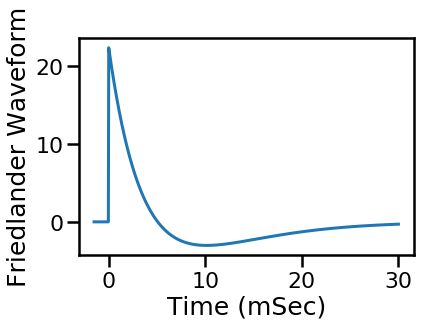

In [57]:
#viz TNT wave
sns.lineplot(x=df_TNT['Time (mSec)'], y=df_TNT['Friedlander Waveform'])

In [34]:
#create df and transpose
df = pd.DataFrame(data = wave_final)
wave_final_transp = df.T
#add time column (use time from TNT wave)
wave_final_transp['time'] = df_TNT['Time (mSec)']
#rearrange df for graphing
df_melt = wave_final_transp.melt(id_vars='time', value_name='Pressure (psi)')
print(df_melt.shape)
df_melt.head()

(275120, 3)


,time,variable,Pressure (psi)
0,-1.521,0,0.170712
1,-1.482,0,0.122565
2,-1.443,0,-0.030927
3,-1.404,0,-0.059026
4,-1.365,0,0.020454


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


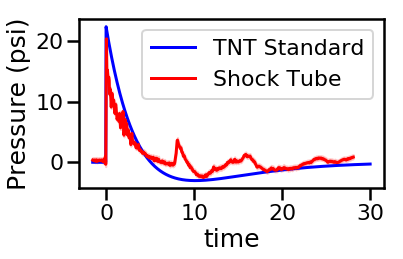

In [63]:
#viz both wave forms
g = sns.lineplot(x=df_TNT['Time (mSec)'], y=df_TNT['Friedlander Waveform'], color="blue", label='TNT Standard')
g = sns.lineplot(x=df_melt['time'], y=df_melt['Pressure (psi)'], color="red", label='Shock Tube')
g.figure.savefig('wave.jpeg')

Save data in excel

In [ ]:
df = pd.DataFrame(data = wave_final_transp)
writer = pd.ExcelWriter('Wave.xlsx', engine='xlsxwriter')
df.to_excel(writer)
writer.save()

Use pyinstaller to make exe for lab members to use